# Credit Risk Modelling – Data Understanding

## Project Context
This project focuses on building a **Probability of Default (PD)** model for loan applicants using historical credit data.  
The objective of this notebook is to **understand the dataset, variables, and target definition** before moving to analysis and modeling.

## Business Relevance
Accurate data understanding is critical in credit risk modeling, as:
- Input variables must be economically meaningful
- Target definition directly impacts PD estimation
- Poor data quality leads to unstable risk models

In [ ]:
# Core Libraries
import pandas as pd
import numpy as np

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:.2f}".format)

## Dataset Overview
This project uses the **German Credit Risk dataset**, which contains historical information on loan applicants along with their credit risk classification.

In [ ]:
df = pd.read_csv("D:/PROJECTS/CREDIT_RISK/DATA/german_credit_data.csv")

# Droping unnecessary index column
df.drop(columns=["Unnamed: 0"], inplace=True)

print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (1000, 10)


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


## Feature Overview

Below is a list of all features along with their data types.
Understanding feature roles is essential before modeling.

In [29]:
pd.DataFrame({
    "Feature": df.columns,
    "Data Type": df.dtypes.values
})

,Feature,Data Type
0,Age,int64
1,Sex,object
2,Job,int64
3,Housing,object
4,Saving accounts,object
5,Checking account,object
6,Credit amount,int64
7,Duration,int64
8,Purpose,object
9,Risk,object


## Business Interpretation of Variables

| Variable | Description |
|--------|-------------|
| Age | Applicant age (years) |
| Sex | Gender of applicant |
| Job | Employment level (0 = unskilled, 3 = highly skilled) |
| Housing | Housing status (own / rent / free) |
| Saving accounts | Savings balance category |
| Checking account | Checking account balance category |
| Credit amount | Loan amount requested |
| Duration | Loan duration (months) |
| Purpose | Purpose of the loan |
| Risk | Credit risk classification (Target) |

## Missing Values Analysis

Missing values are common in real-world banking data and must be handled carefully.

In [30]:
missing_summary = (
    df.isna()
      .sum()
      .to_frame("Missing Count")
      .assign(Missing_Percent=lambda x: (x["Missing Count"] / len(df) * 100).round(2))
)

missing_summary

,Missing Count,Missing_Percent
Age,0,0.00
Sex,0,0.00
Job,0,0.00
Housing,0,0.00
Saving accounts,183,18.30
Checking account,394,39.40
Credit amount,0,0.00
Duration,0,0.00
Purpose,0,0.00
Risk,0,0.00


## Target Variable – Credit Risk

The target variable **Risk** represents borrower creditworthiness.

- **good** → Non-default (0)
- **bad** → Default (1)

This aligns with **Probability of Default (PD)** modeling conventions.

In [31]:
df["Risk"].value_counts()
df["Risk"].value_counts(normalize=True).rename("Proportion")

Risk
good   0.70
bad    0.30
Name: Proportion, dtype: float64

## Target Distribution

Class imbalance assessment is critical for credit risk models.

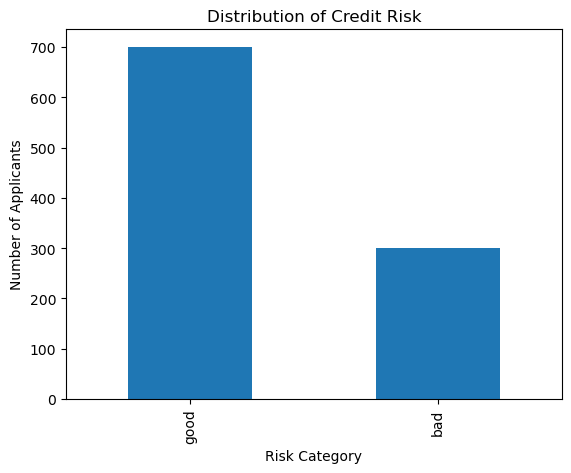

In [32]:
import matplotlib.pyplot as plt

df["Risk"].value_counts().plot(
    kind="bar",
    title="Distribution of Credit Risk",
    xlabel="Risk Category",
    ylabel="Number of Applicants"
)
plt.show()

## Numerical Variables Summary

Numerical variables are examined for scale, range, and plausibility.

In [33]:
numerical_cols = ["Age", "Job", "Credit amount", "Duration"]
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.00,35.55,11.38,19.00,27.00,33.00,42.00,75.00
Job,1000.00,1.90,0.65,0.00,2.00,2.00,2.00,3.00
Credit amount,1000.00,3271.26,2822.74,250.00,1365.50,2319.50,3972.25,18424.00
Duration,1000.00,20.90,12.06,4.00,12.00,18.00,24.00,72.00


## Categorical Variables Summary

Categorical variables will later require encoding.

In [34]:
categorical_cols = df.select_dtypes(include="object").columns

for col in categorical_cols:
    print(f"\n🔹 {col}")
    display(df[col].value_counts())


🔹 Sex


Sex
male      690
female    310
Name: count, dtype: int64


🔹 Housing


Housing
own     713
rent    179
free    108
Name: count, dtype: int64


🔹 Saving accounts


Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64


🔹 Checking account


Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64


🔹 Purpose


Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64


🔹 Risk


Risk
good    700
bad     300
Name: count, dtype: int64

## Key Takeaways from Data Understanding

- The dataset represents realistic retail banking credit data.
- The target variable is clearly defined for PD modeling.
- Missing values are present in account-related variables and reflect real-world data issues.
- Both numerical and categorical variables are economically meaningful.

➡️ The dataset is now ready for **Exploratory Data Analysis (EDA)**.